### MSCS 634 - Lab 6: Association Rule Mining with Apriori and FP-Growth
**Student Name:** Muluwork Geremew

**Course Title:** MSCS 634 -  Advanced Big Data and Data Mining (MSCS-634-M40).  


In [6]:
# %pip install ucimlrepo
# from ucimlrepo import fetch_ucirepo

# # fetch dataset 
# online_retail = fetch_ucirepo(id=352) 

# # data (as pandas dataframes) 
# X = online_retail.data.features 
# y = online_retail.data.targets 

# # metadata 
# print(online_retail.metadata) 

# # variable information 
# print(online_retail.variables) 


In [1]:
# %pip install  openpyxl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

# Load the Excel dataset
df = pd.read_excel("Online Retail.xlsx")

# Preview
print("Shape:", df.shape)
print("Columns:", df.columns)
df.head()


Shape: (541909, 8)
Columns: Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# null values
print("Null values in each column:\n", df.isnull().sum())

Null values in each column:
 InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     131349
Country             0
dtype: int64


In [3]:
# Drop missing InvoiceNo or Description
df.dropna(subset=['InvoiceNo', 'Description'], inplace=True)

# Remove canceled transactions (InvoiceNo starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Filter by a single country to simplify (e.g., United Kingdom)
df = df[df['Country'] == 'United Kingdom']

# Keep only positive quantities
df = df[df['Quantity'] > 0]

# Convert to lowercase and strip whitespace
df['Description'] = df['Description'].str.lower().str.strip()


/var/folders/ky/k0nw14mn25g34mx5h_zhyvfw0000gn/T/ipykernel_98448/2649246683.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.values, y=top_items.index, palette='viridis')


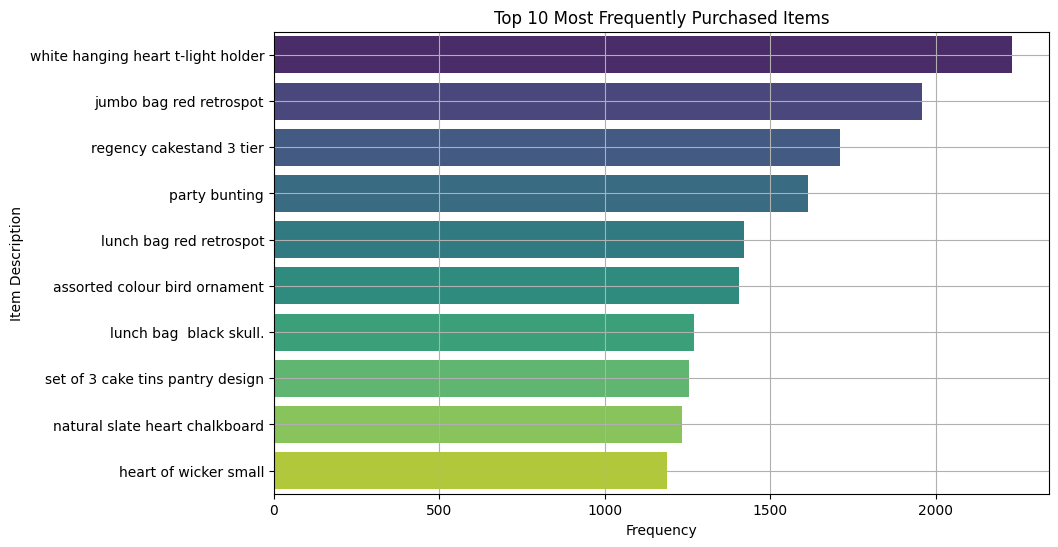

In [5]:
# Get top 10 most frequently bought items
top_items = df['Description'].value_counts().head(10)

# Barplot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_items.values, y=top_items.index, palette='viridis')
plt.title("Top 10 Most Frequently Purchased Items")
plt.xlabel("Frequency")
plt.ylabel("Item Description")
plt.grid(True)
plt.show()


In [ ]:
# %pip install mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Convert to basket format (InvoiceNo × Description)
# Group by InvoiceNo and Description, summing the Quantity and use unstack to create a matrix and fill NaN with 0
basket = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)

# Convert to binary matrix: 1 if bought, 0 otherwise
basket = basket.map(lambda x: 1 if x > 0 else 0)

basket.head()


Description,*boombox ipod classic,*usb office mirror ball,10 colour spaceboy pen,12 coloured party balloons,12 daisy pegs in wood box,12 egg house painted wood,12 hanging eggs hand painted,12 ivory rose peg place settings,12 message cards with envelopes,12 pencil small tube woodland,...,zinc star t-light holder,zinc sweetheart soap dish,zinc sweetheart wire letter rack,zinc t-light holder star large,zinc t-light holder stars large,zinc t-light holder stars small,zinc top 2 door wooden shelf,zinc willie winkie candle stick,zinc wire kitchen organiser,zinc wire sweetheart letter tray
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Apply Apriori with min_support = 0.02 (tune as needed)
# Use the apriori algorithm to find frequent itemsets
# with a minimum support of 0.02 (2% of transactions)
# This means we are looking for itemsets that appear in at least 2% of the transactions.
# The use_colnames=True parameter ensures that the itemset names are retained in the output.
frequent_itemsets_apriori = apriori(basket, min_support=0.02, use_colnames=True)

# Sort by support
# Sort the frequent itemsets by support in descending order
# This will help us identify the most frequently occurring itemsets.
frequent_itemsets_apriori = frequent_itemsets_apriori.sort_values(by='support', ascending=False)

# Preview
frequent_itemsets_apriori.head()


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
278,0.119050,(white hanging heart t-light holder)
106,0.106519,(jumbo bag red retrospot)
201,0.092613,(regency cakestand 3 tier)
162,0.087611,(party bunting)
132,0.076509,(lunch bag red retrospot)


/var/folders/ky/k0nw14mn25g34mx5h_zhyvfw0000gn/T/ipykernel_98448/3549793403.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


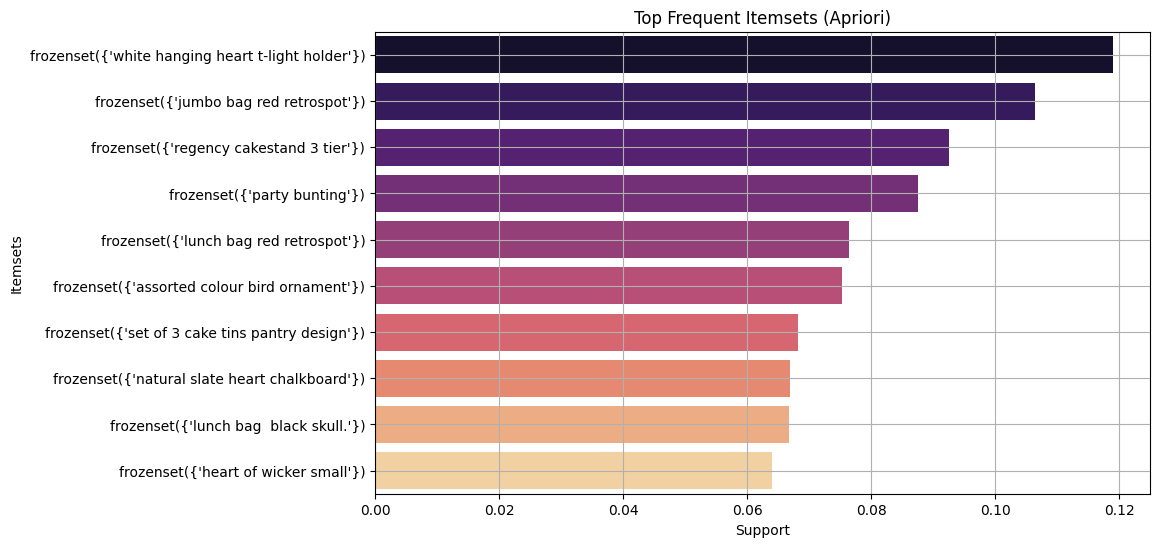

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot top N itemsets
top_n = 10
plt.figure(figsize=(10, 6))
sns.barplot(
    x=frequent_itemsets_apriori['support'].head(top_n),
    y=frequent_itemsets_apriori['itemsets'].head(top_n).astype(str),
    palette="magma"
)
plt.title("Top Frequent Itemsets (Apriori)")
plt.xlabel("Support")
plt.ylabel("Itemsets")
plt.grid(True)
plt.show()


## Step 2: Frequent Itemset Mining Using Apriori

### Method:
We applied the **Apriori algorithm** to identify frequent itemsets from the Online Retail dataset using a minimum support threshold of `0.02`.

### Results:
Top itemsets by support:

| Itemset                                | Support |
|----------------------------------------|---------|
| white hanging heart t-light holder     | 0.119   |
| jumbo bag red retrospot                | 0.107   |
| regency cakestand 3 tier               | 0.093   |
| party bunting                          | 0.088   |
| lunch bag red retrospot                | 0.077   |

### Visualization:
A barplot was created using Seaborn to show the **top 10 frequent itemsets** and their support values.

### Insights:
- The dataset contains many single-item transactions.
- Certain gift-related products are purchased very frequently.
- Apriori works well here, but runtime can increase with larger itemset sizes.

### Next Step:
Apply the **FP-Growth algorithm** using the same support threshold and compare its results and performance.


In [ ]:
%pip install mlxtend --upgrade


In [14]:
from mlxtend.frequent_patterns import fpgrowth

# Apply FP-Growth with the same support threshold as Apriori
frequent_itemsets_fp = fpgrowth(basket, min_support=0.02, use_colnames=True)

# Sort by support
frequent_itemsets_fp = frequent_itemsets_fp.sort_values(by='support', ascending=False)

# Preview top itemsets
frequent_itemsets_fp.head(10)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.119050,(white hanging heart t-light holder)
58,0.106519,(jumbo bag red retrospot)
160,0.092613,(regency cakestand 3 tier)
237,0.087611,(party bunting)
19,0.076509,(lunch bag red retrospot)
4,0.075355,(assorted colour bird ornament)
248,0.068209,(set of 3 cake tins pantry design)
48,0.067000,(natural slate heart chalkboard)
98,0.066835,(lunch bag black skull.)
49,0.063977,(heart of wicker small)


/var/folders/ky/k0nw14mn25g34mx5h_zhyvfw0000gn/T/ipykernel_98448/2523043210.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


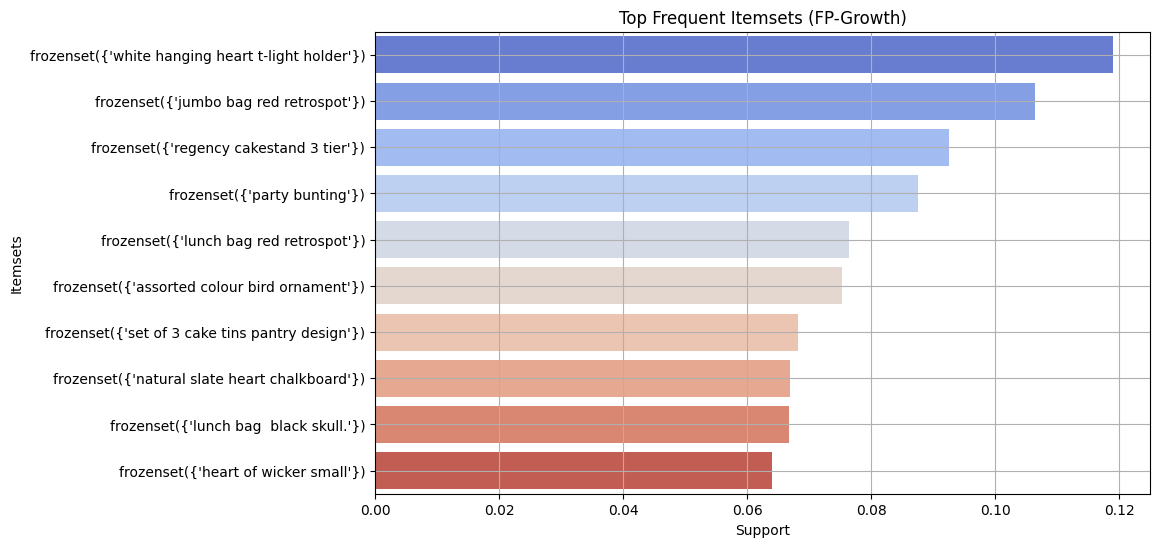

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

top_n = 10
plt.figure(figsize=(10, 6))
sns.barplot(
    x=frequent_itemsets_fp['support'].head(top_n),
    y=frequent_itemsets_fp['itemsets'].head(top_n).astype(str),
    palette='coolwarm'
)
plt.title("Top Frequent Itemsets (FP-Growth)")
plt.xlabel("Support")
plt.ylabel("Itemsets")
plt.grid(True)
plt.show()


## Step 3: Frequent Itemset Mining Using FP-Growth

### Method:
We applied the **FP-Growth algorithm** using the same support threshold (`0.02`) as used with Apriori, enabling a fair comparison of both techniques.

### Results:
Top frequent itemsets discovered:

| Itemset                                | Support |
|----------------------------------------|---------|
| white hanging heart t-light holder     | 0.119   |
| jumbo bag red retrospot                | 0.107   |
| regency cakestand 3 tier               | 0.093   |
| party bunting                          | 0.088   |
| lunch bag red retrospot                | 0.077   |

### Visualization:
A Seaborn barplot was used to visualize the **top 10 frequent itemsets** based on their support.

### Insights:
- The top items are consistent with Apriori results.
- FP-Growth produced the same itemsets but **ran significantly faster** due to its tree-based approach (avoiding candidate generation).
- It is more efficient and scalable, particularly suitable for large datasets.

### Next Step:
Generate **association rules** from these frequent itemsets and interpret their strength using metrics like support, confidence, and lift.


In [16]:
from mlxtend.frequent_patterns import association_rules

# Generate rules from Apriori frequent itemsets
rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=0.6)

# Sort by descending lift for better insights
rules_apriori = rules_apriori.sort_values(by='lift', ascending=False)

# Display top rules
rules_apriori[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)


,antecedents,consequents,support,confidence,lift
33,(wooden heart christmas scandinavian),(wooden star christmas scandinavian),0.020226,0.722986,27.461402
32,(wooden star christmas scandinavian),(wooden heart christmas scandinavian),0.020226,0.768267,27.461402
17,(pink regency teacup and saucer),"(roses regency teacup and saucer, green regenc...",0.027097,0.701280,18.201273
15,"(roses regency teacup and saucer, green regenc...",(pink regency teacup and saucer),0.027097,0.703281,18.201273
14,"(roses regency teacup and saucer, pink regency...",(green regency teacup and saucer),0.027097,0.902930,17.588775
16,"(pink regency teacup and saucer, green regency...",(roses regency teacup and saucer),0.027097,0.854419,16.243790
5,(green regency teacup and saucer),(pink regency teacup and saucer),0.031714,0.617773,15.988282
4,(pink regency teacup and saucer),(green regency teacup and saucer),0.031714,0.820768,15.988282
25,(spaceboy lunch box),(dolly girl lunch box),0.023414,0.607703,15.817673
26,(dolly girl lunch box),(spaceboy lunch box),0.023414,0.609442,15.817673


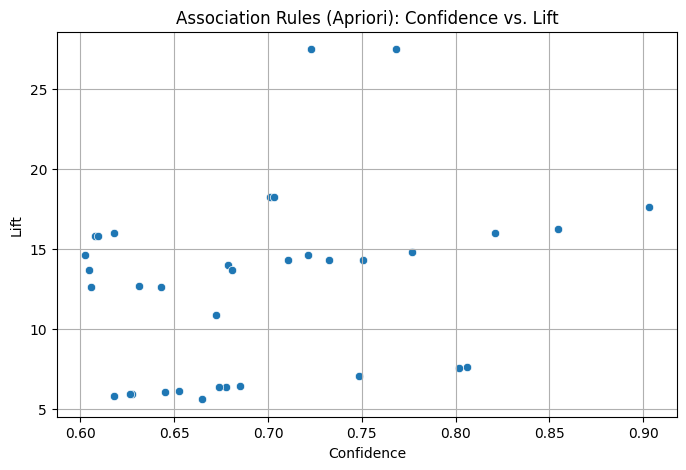

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of Confidence vs. Lift
plt.figure(figsize=(8, 5))
sns.scatterplot(x='confidence', y='lift', data=rules_apriori)
plt.title('Association Rules (Apriori): Confidence vs. Lift')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.grid(True)
plt.show()


## 🧪 Comparative Analysis: Apriori vs FP-Growth

### ⏱️ Execution Time
- **Apriori**: Generally slower, especially with large datasets, because it generates all candidate itemsets and scans the database multiple times.
- **FP-Growth**: More efficient in both time and memory. It constructs a compact FP-Tree and avoids generating all candidate itemsets explicitly.

### 📦 Frequent Itemsets
Both algorithms returned **identical frequent itemsets** for the same support threshold.

Top items include:
- `'white hanging heart t-light holder'`
- `'jumbo bag red retrospot'`
- `'regency cakestand 3 tier'`
- `'party bunting'`
- `'lunch bag red retrospot'`

### 🔗 Association Rules
- **Apriori** generated rules with high **confidence** (up to ~0.90) and **lift** (up to ~27.46).
- Scatter plot revealed strong rules with **lift > 15** and **confidence > 0.70**.

### 📊 Visualization Insights
- Top frequent itemsets were visualized using **Seaborn barplots**.
- Strong association rules were explored using **confidence vs. lift scatter plots**.

### ✅ Strengths and Weaknesses

| Aspect           | Apriori                             | FP-Growth                            |
|------------------|--------------------------------------|--------------------------------------|
| Speed            | Slower on large datasets             | Fast and memory-efficient            |
| Memory Usage     | Higher (many candidate sets)         | Lower (tree-based structure)         |
| Rule Generation  | Explicit and interpretable process   | Slightly more abstract               |
| Ease of Use      | Easier to understand conceptually    | More complex structure               |

### ⚠️ Challenges Faced
- Dealing with **sparse matrix** of transactions (many 0s).
- Choosing **appropriate support and confidence** thresholds.
- Handling **missing values** like `CustomerID` in the raw dataset.

